# Exploring Datasets

In [1]:
import pandas as pd

# Seattle and Austin Weather Data

In [2]:
seattle_df = pd.read_csv('./Data/seattle_weather.csv')
austin_df  = pd.read_csv('./Data/austin_weather.csv')

In [3]:
def convert_to_month_abbr(month_num):
    return ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'][month_num-1]

In [4]:
seattle_df['MONTH'] = seattle_df['DATE'].apply(convert_to_month_abbr)
seattle_df['MONTH'].head(3)

0    JAN
1    FEB
2    MAR
Name: MONTH, dtype: object

In [5]:
austin_df['MONTH'] = austin_df['DATE'].apply(convert_to_month_abbr)
austin_df['MONTH'].head(3)

0    JAN
1    FEB
2    MAR
Name: MONTH, dtype: object

In [6]:
# What we focus on:
# "MONTH" stores month name abbr.
# "MLY-PRCP-NORMAL" stores the average rainfall in each month during a ten-year period.

seattle_df = seattle_df[['MONTH', 'MLY-PRCP-NORMAL', 'MLY-PRCP-25PCTL', 'MLY-PRCP-75PCTL', 'MLY-TAVG-NORMAL', 'MLY-TAVG-STDDEV']]
austin_df  = austin_df[['MONTH', 'MLY-PRCP-NORMAL', 'MLY-PRCP-25PCTL', 'MLY-PRCP-75PCTL', 'MLY-TAVG-NORMAL', 'MLY-TAVG-STDDEV']]

In [7]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            204 non-null    object 
 1   MLY-PRCP-NORMAL  204 non-null    float64
 2   MLY-PRCP-25PCTL  156 non-null    float64
 3   MLY-PRCP-75PCTL  156 non-null    float64
 4   MLY-TAVG-NORMAL  180 non-null    float64
 5   MLY-TAVG-STDDEV  180 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.7+ KB


In [8]:
austin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            12 non-null     object 
 1   MLY-PRCP-NORMAL  12 non-null     float64
 2   MLY-PRCP-25PCTL  12 non-null     float64
 3   MLY-PRCP-75PCTL  12 non-null     float64
 4   MLY-TAVG-NORMAL  12 non-null     float64
 5   MLY-TAVG-STDDEV  12 non-null     float64
dtypes: float64(5), object(1)
memory usage: 704.0+ bytes


In [9]:
austin_df

,MONTH,MLY-PRCP-NORMAL,MLY-PRCP-25PCTL,MLY-PRCP-75PCTL,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV
0,JAN,2.20,0.83,2.76,49.2,3.0
1,FEB,2.31,1.00,3.23,52.1,3.4
2,MAR,2.78,1.68,3.82,59.2,3.1
3,APR,2.27,0.91,3.04,67.3,2.9
4,MAY,4.05,1.73,6.12,75.2,2.4
5,JUN,4.63,2.28,6.65,81.0,2.2
6,JUL,2.44,0.97,3.20,83.4,1.9
7,AUG,2.03,0.74,2.58,83.7,1.6
8,SEP,2.54,0.77,4.06,77.8,2.0
9,OCT,4.24,1.57,6.50,69.0,1.9


## Manipulating Seattle Data

In [10]:
seattle_df = seattle_df.groupby('MONTH').mean().reset_index()
seattle_df

,MONTH,MLY-PRCP-NORMAL,MLY-PRCP-25PCTL,MLY-PRCP-75PCTL,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV
0,APR,4.174706,3.338462,5.503846,49.646667,1.860000
1,AUG,1.343529,0.618462,1.946923,65.106667,1.446667
2,DEC,7.131765,5.714615,9.470000,39.473333,2.600000
3,FEB,4.958235,3.440769,6.746154,42.320000,2.613333
4,JAN,7.442353,5.774615,10.304615,40.980000,2.593333
5,JUL,1.265882,0.563077,1.960769,64.733333,2.173333
6,JUN,2.630000,1.722308,3.909231,60.093333,1.986667
7,MAR,5.389412,4.615385,6.895385,45.693333,2.280000
8,MAY,3.370000,2.646154,4.603846,55.186667,2.100000
9,NOV,8.477647,5.943846,11.954615,44.540000,2.926667


In [11]:
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
seattle_df['MONTH'] = pd.Categorical(seattle_df['MONTH'], categories=months, ordered=True)
seattle_df['MONTH']

0     APR
1     AUG
2     DEC
3     FEB
4     JAN
5     JUL
6     JUN
7     MAR
8     MAY
9     NOV
10    OCT
11    SEP
Name: MONTH, dtype: category
Categories (12, object): ['JAN' < 'FEB' < 'MAR' < 'APR' ... 'SEP' < 'OCT' < 'NOV' < 'DEC']

In [12]:
seattle_df.sort_values(by='MONTH', inplace=True)
seattle_df

,MONTH,MLY-PRCP-NORMAL,MLY-PRCP-25PCTL,MLY-PRCP-75PCTL,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV
4,JAN,7.442353,5.774615,10.304615,40.980000,2.593333
3,FEB,4.958235,3.440769,6.746154,42.320000,2.613333
7,MAR,5.389412,4.615385,6.895385,45.693333,2.280000
0,APR,4.174706,3.338462,5.503846,49.646667,1.860000
8,MAY,3.370000,2.646154,4.603846,55.186667,2.100000
6,JUN,2.630000,1.722308,3.909231,60.093333,1.986667
5,JUL,1.265882,0.563077,1.960769,64.733333,2.173333
1,AUG,1.343529,0.618462,1.946923,65.106667,1.446667
11,SEP,2.324118,1.288462,3.513077,60.040000,1.766667
10,OCT,4.915882,3.410000,6.894615,51.800000,1.586667


# Climate Change Data

a more complex dataset, that contains records of the <b>change in climate in the last half a century or so </b>.
* The "date" column indicates when the recording was made and is stored in the year-month-date format.A measurement was taken on the 6th day of every month from 1958 until 2016. 
* The column "co2" contains measurements of the carbon dioxide in the atmosphere. The number shown in each row is parts-per-million of carbon dioxide.
* The column "relative-underscore-temp" denotes the temperature measured at this date, relative to a baseline which is the average temperature in the first ten years of measurements.

In [13]:
climate_change = pd.read_csv('./Data/climate_change.csv', parse_dates=["date"], index_col="date")
climate_change.head(5)

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


# Olympic Games Medals
a dataset that contains information about the number of medals won by a few countries in the 2016 Olympic Games.

In [14]:
medals = pd.read_csv("./Data/medals_by_country_2016.csv", index_col=0)
medals

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


<br>
<br>
The data is not very large. Here is all of it. Although you can see all of it in front of you, it's not that easy to make comparisons between different countries and see which countries won which medals.
<br>
<br>
<br>
<br>


# 2016 Olympic Games Full
data about The athletes who participated

In [15]:
olympic = pd.read_csv('./Data/summer2016.csv')
olympic.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [16]:
rowing = olympic[olympic['Sport'] == 'Rowing']
rowing.head(1)

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze


In [17]:
gymnastics = olympic[olympic['Sport'] == 'Gymnastics']
gymnastics.head(1)

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


- Visualizing data in plots and figures exposes the underlying patterns in the data and provides insights. 
- Good visualizations also help you communicate your data to others, and are useful to data analysts and other consumers of the data.
- Matplotlib provides the building blocks to create rich visualizations of many different kinds of datasets.

# CHAPTER 1: Introduction to Matplotlib

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

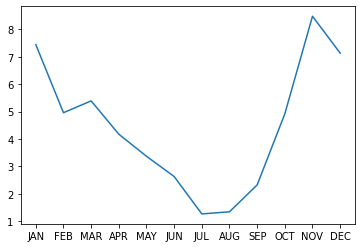

In [19]:
fig, ax = plt.subplots()

ax.plot(seattle_df['MONTH'], seattle_df['MLY-PRCP-NORMAL'])

plt.show()

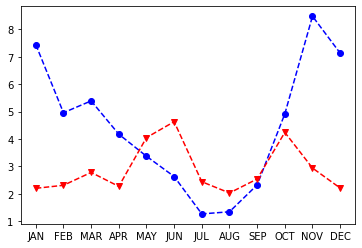

In [20]:
fig, ax = plt.subplots()

# setting data appearance
ax.plot(seattle_df["MONTH"], seattle_df["MLY-PRCP-NORMAL"],
        color='b', marker='o', linestyle='--')

ax.plot(austin_df["MONTH"], austin_df["MLY-PRCP-NORMAL"],
        color='r', marker='v', linestyle='--')

Text(0.5, 1.0, 'Weather patterns in Austin and Seattle')

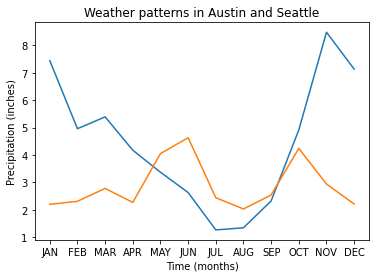

In [21]:
fig, ax = plt.subplots()

ax.plot(seattle_df["MONTH"], seattle_df["MLY-PRCP-NORMAL"])
ax.plot(austin_df["MONTH"], austin_df["MLY-PRCP-NORMAL"])

ax.set_xlabel("Time (months)")
ax.set_ylabel("Precipitation (inches)")
ax.set_title("Weather patterns in Austin and Seattle")

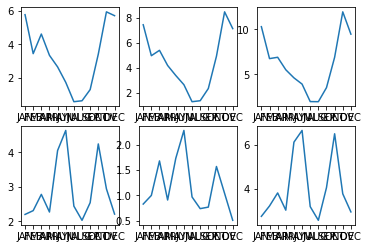

In [22]:
# Create a Grid Figure of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 3)

# How to Address the ax now ?
# plot month and Seattle precipitation
ax[0, 0].plot(seattle_df["MONTH"], seattle_df["MLY-PRCP-25PCTL"])
ax[0, 1].plot(seattle_df["MONTH"], seattle_df["MLY-PRCP-NORMAL"])
ax[0, 2].plot(seattle_df["MONTH"], seattle_df["MLY-PRCP-75PCTL"])

# 
ax[1, 1].plot(austin_df["MONTH"], austin_df["MLY-PRCP-25PCTL"])
ax[1, 0].plot(austin_df["MONTH"], austin_df["MLY-PRCP-NORMAL"])
ax[1, 2].plot(austin_df["MONTH"], austin_df["MLY-PRCP-75PCTL"])

## Too much data!

### Adding more data to a plot can make the plot too busy, obscuring patterns rather than revealing them.

### Sharing the y-axis range so, the comparison across datasets is more straightforward.




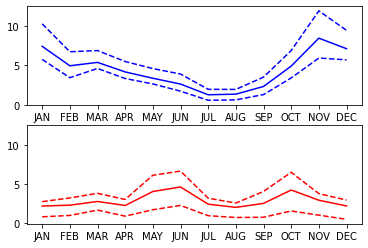

In [23]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation in the top axes
ax[0].plot(seattle_df["MONTH"], seattle_df["MLY-PRCP-NORMAL"], color='b')
ax[0].plot(seattle_df["MONTH"], seattle_df["MLY-PRCP-25PCTL"], color='b', linestyle='--')
ax[0].plot(seattle_df["MONTH"], seattle_df["MLY-PRCP-75PCTL"], color='b', linestyle='--')

# Plot Austin precipitation in the bottom axes
ax[1].plot(austin_df["MONTH"], austin_df["MLY-PRCP-NORMAL"], color='r')
ax[1].plot(austin_df["MONTH"], austin_df["MLY-PRCP-25PCTL"], color='r', linestyle='--')
ax[1].plot(austin_df["MONTH"], austin_df["MLY-PRCP-75PCTL"], color='r', linestyle='--')

# CHAPTER2: Plotting time-series

### Visualizing this type of data helps clarify trends and illuminates relationships between data.



Text(0, 0.5, 'Relative temperature (Celsius)')

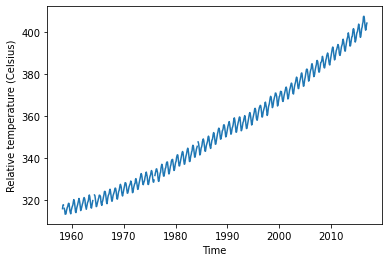

In [24]:
fig, ax = plt.subplots()

# climate_change.index is The time-series
ax.plot(climate_change.index, climate_change['co2'])

ax.set_xlabel('Time')
ax.set_ylabel('Relative temperature (Celsius)')

<br>
<br>

### The data visualization tells a clear story: there are some small seasonal fluctuations in the amount of CO2 measured, and an overall increase in the amount of CO2 in the atmosphere from about 320 parts per million to about 400 parts per million.

<br>
<br>


### Using a time index to zoom in


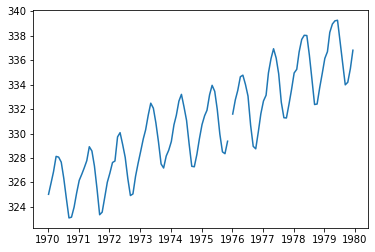

In [25]:
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]
ax.plot(seventies.index, seventies["co2"])

#### the missing values in this time series are represented as breaks in the line plotted by Matplotlib.
<br>
<br>



## Two time-series coincides with Different Scales Comparison

If you want to plot two time-series variables that were recorded at the same times, you can add both of them to the same subplot.

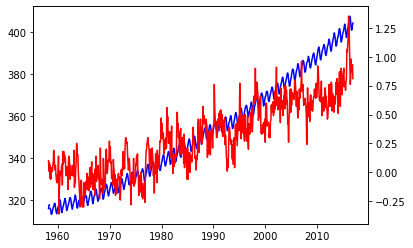

In [26]:
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

ax2.plot(climate_change.index, climate_change["relative_temp"], color='red')

### Don't repeat yourself.

In [27]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    """
    Plot Timeseries
    consumes 
    axes: matplotlib Object returned from subplots()
    x: The Data on X axis
    y: The Data on Y axis
    color: color of the plot
    x_label
    y_label
    """
    axes.plot(x, y, color=color)

    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    
    axes.tick_params('y', colors=color)

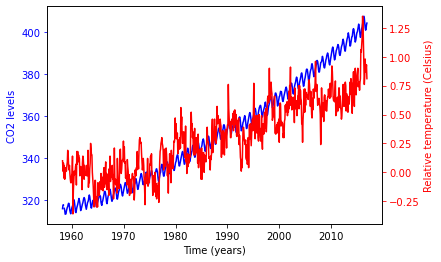

In [28]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

ax_twins = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax_twins, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temperature (Celsius)")

## Enhance by Annotation, Draw Attention, highlight interesting information

let's say that we noticed that the first date in which the relative temperature exceeded 1 degree Celsius was October 6th, 2015. We'd like to point this out in the plot.

Text(2015-10-06 00:00:00, 1, '>1 degree')

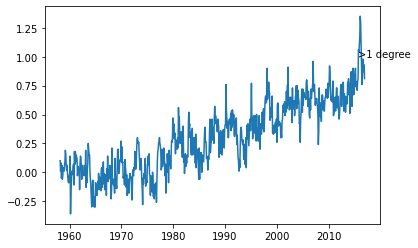

In [29]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1))


Text(2008-10-06 00:00:00, -0.2, '>1 degree')

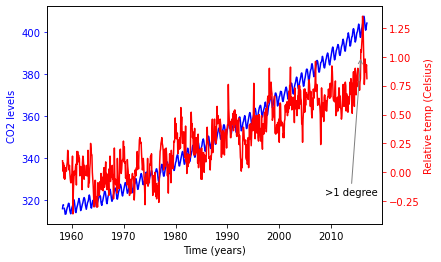

In [30]:
fig, ax = plt.subplots()

plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

ax2 = ax.twinx()

plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

ax2.annotate(">1 degree", 
             xy=(pd.Timestamp('2015-10-06'), 1), 
             xytext=(pd.Timestamp('2008-10-06'), -0.20), arrowprops={'arrowstyle':'->', 'color':'gray'})


# CHAPTER3: Quantitative comparisons and statistical visualizations
quantitative comparisons <b>between parts of the data.<b>



/tmp/ipykernel_39510/1023146224.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


Text(0, 0.5, 'Number of Gold Medals')

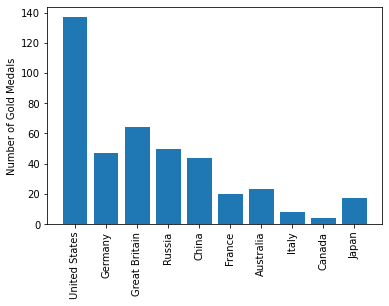

In [31]:
figure, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])

# Unfortunately, these names are rather long, so they overlap with each other. How to fix that? Interlude.
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of Gold Medals")

<br>
<br>
Visualizing the data in this way shows us which countries got a high or low number of gold medals, but also allows us to see the differences between countries, based on the difference in heights between the bars.
<br>
<br>


## stacked bar chart
Add the data about the other medals on same plot: Silver and Bronze.
This means that each new data will be stacked on top of the previous data

/tmp/ipykernel_39510/657767915.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


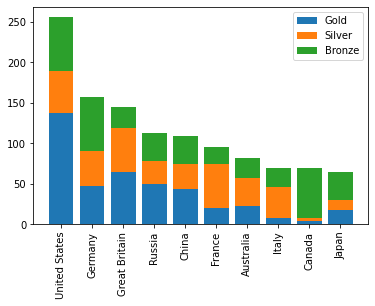

In [32]:
figure, ax = plt.subplots()

ax.bar(medals.index, medals["Gold"], label="Gold")
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze")

ax.set_xticklabels(medals.index, rotation=90)
ax.legend()

### Histogram
Bar-charts show us the value of a variable in different conditions. <br> Histograms visualization is useful because it shows us the entire distribution of values within a variable.<br>



<BarContainer object of 1 artists>

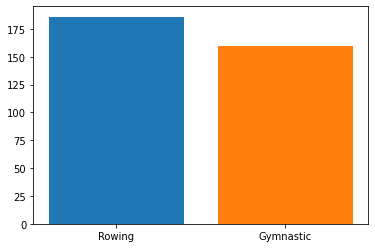

In [33]:
# Bar-Charts shows Comparison of a Variable under Different Conditions

figure, ax = plt.subplots()

ax.bar('Rowing', rowing['Height'].mean(), label='rowing')
ax.bar('Gymnastic', gymnastics['Height'].mean(), label='gymnastic')

Text(0, 0.5, '# of observations')

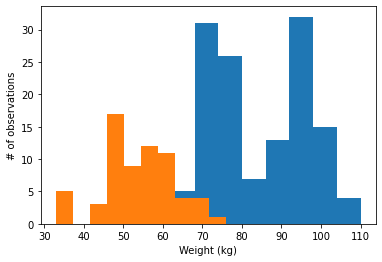

In [34]:
# A histogram would instead show the full distribution of values within each variable

fig, ax = plt.subplots()

ax.hist(rowing["Weight"])


ax.hist(gymnastics["Weight"])

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

<br>
<br>
you might wonder whether there are any rowing medalists with a height of less than 180 centimeters. This is hard to tell because the bars 
for the gymnastics histogram are occluding this information.
<br>
<br>
<br>


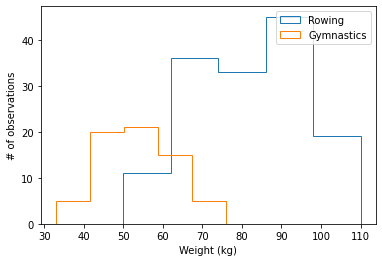

In [35]:
# a little Customizations: "Step" histogram to eliminate occlusion displays the histogram as thin lines
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(rowing["Weight"], histtype='step', label="Rowing", bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(gymnastics["Weight"], histtype='step', label="Gymnastics", bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()

### Adding error bars to bar charts

Additional markers on a plot or bar chart that tell us something about the distribution of the data. <br> 
Histograms show the entire distribution. <br>
Error bars instead summarize the distribution of the data in one number, such as the standard deviation of the values.

### Adding boxplots
shows us several landmarks in each distribution. the median of the variable.<br>
The edges of the box portion at the center indicate the inter-quartile range of the data, between the 25th and the 75th percentiles.<br>
The whiskers at the ends of the thin bars indicate one and a half times the size of the inter-quartile range beyond the 75th and 25th percentiles.WHY? <br>
Theory: if the data distribution is Gaussian or normal This should encompass roughly 99 percent of the distribution, Points that appear beyond the whiskers are outliers.


Text(0, 0.5, 'Height (cm)')

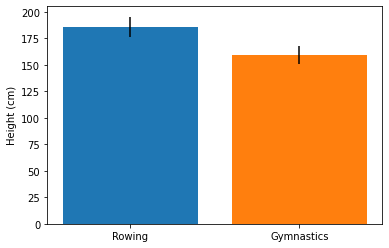

In [36]:
fig, ax = plt.subplots()

ax.bar("Rowing", rowing["Height"].mean(), yerr=rowing["Height"].std())
ax.bar("Gymnastics", gymnastics["Height"].mean(), yerr=gymnastics["Height"].std())

ax.set_ylabel("Height (cm)")

<br>
These error bars can help you see that the difference in heights is rather large in terms of the standard deviation within every group.
<br>
<br>
<br>



Text(0, 0.5, 'Temperature (Fahrenheit)')

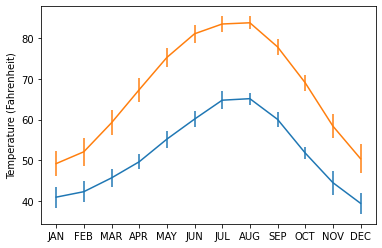

In [39]:
fig, ax = plt.subplots()

# Add the Seattle temperature data in each month with standard deviation error bars
ax.errorbar(seattle_df["MONTH"], seattle_df["MLY-TAVG-NORMAL"], yerr=seattle_df["MLY-TAVG-STDDEV"])

# Add the Austin temperature data in each month with standard deviation error bars
ax.errorbar(austin_df["MONTH"], austin_df["MLY-TAVG-NORMAL"], yerr=austin_df["MLY-TAVG-STDDEV"])

ax.set_ylabel("Temperature (Fahrenheit)")

Text(0, 0.5, 'Height (cm)')

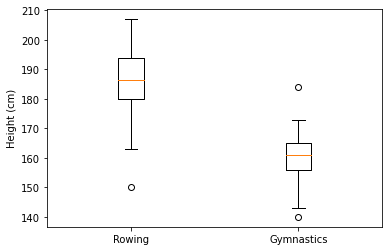

In [40]:
fig, ax = plt.subplots()

ax.boxplot( [rowing["Height"], gymnastics["Height"]] )

ax.set_xticklabels( ["Rowing", "Gymnastics"] )
ax.set_ylabel("Height (cm)")

## Quantitative comparisons: scatter plots (bi-variate comparison)
Bar charts show us the values of one variable across different conditions <br>
But what if you want to compare the values of different variables across observations ?



Text(0, 0.5, 'Relative temperature (C)')

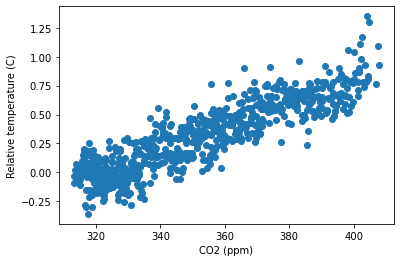

In [41]:
# measurements of carbon dioxide and a column with concurrent measurements of the relative temperature. Because these measurements are paired up in this way, we can represent each measurement as a point

fig, ax = plt.subplots()

ax.scatter(climate_change["co2"], climate_change["relative_temp"])

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (C)")

#### Show two bivariate comparisons side-by-side on same axis "visually distinct". 

To achieve "Visually Distinct" Creteria
- make dublicate scales
- Encoding time by color

Text(0, 0.5, 'Relative temperature (C)')

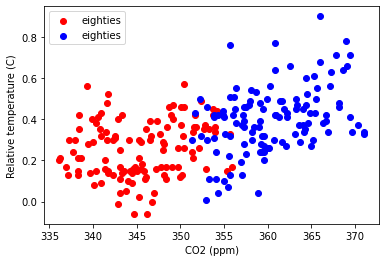

In [51]:
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]

fig, ax = plt.subplots()

ax.scatter(eighties["co2"], eighties["relative_temp"],
          color='red', label='eighties')

ax.scatter(nineties["co2"], nineties["relative_temp"],
          color='blue', label='eighties')

ax.legend()

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (C)")

see that the relationship between temperatures and carbon dioxide didn't change much during these years, but both levels of carbon dioxide and temperatures continued to rise in the nineties. Color can be used for a comparison, as we did here.
<br>
<br>
<br>


Text(0, 0.5, 'Relative temperature (C)')

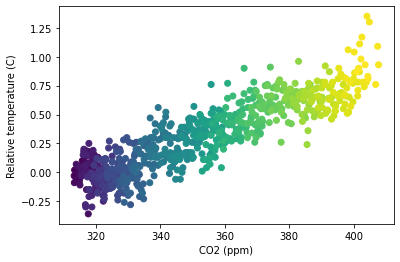

In [42]:
fig, ax = plt.subplots()

# encode a third variable, The timeseries
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (C)")

brightness of the color applied to the points, with dark blue points early on and later points in bright yellow.
<br>
<br>
<br>
<br>


# CHAPTER4: Sharing visualizations with others
- save your figures as files
- adjust their look and feel
- automate their creation based on input data.

### Switching between styles

Text(0, 0.5, 'Relative temperature (C)')

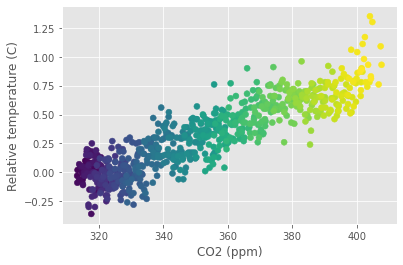

In [53]:
plt.style.use('ggplot')

fig, ax = plt.subplots()

# encode a third variable, The timeseries
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (C)")

Text(0, 0.5, 'Relative temperature (C)')

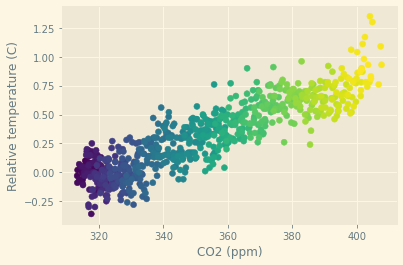

In [55]:
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots()

# encode a third variable, The timeseries
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (C)")

Text(0, 0.5, 'Relative temperature (C)')

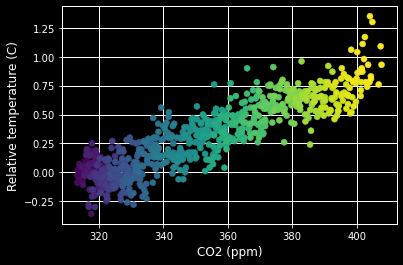

In [57]:
plt.style.use('dark_background')

fig, ax = plt.subplots()

# encode a third variable, The timeseries
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (C)")

In [58]:
plt.style.use('default')

### Saving your visualizations

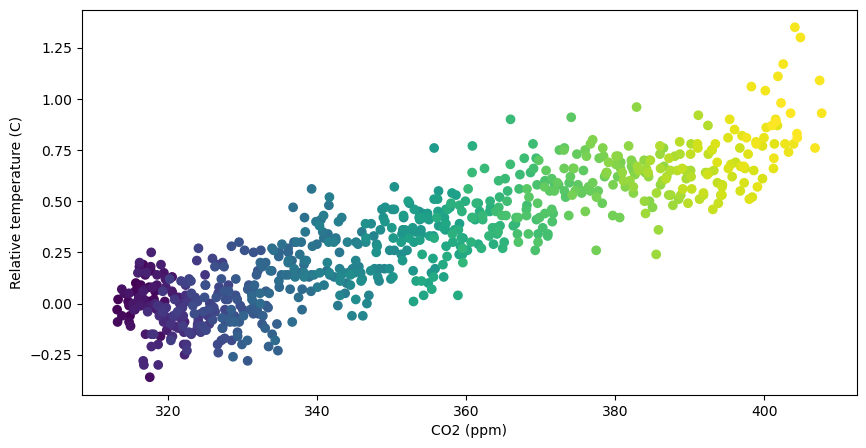

In [84]:
fig, ax = plt.subplots()

# encode a third variable, The timeseries
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (C)")

# set the size of the Figure
fig.set_size_inches([10, 5])


# save the figures in different formats for different Purposes

# fig.savefig('co2_correlation_with_Temp.jpg')   # lossly compression
# fig.savefig('co2_correlation_with_Temp.png')   # higher quality
# fig.savefig('co2_correlation_with_Temp.svg')   # if you want it editable

# control the quality of the images that you produce is the dpi key-word argument
# fig.savefig('co2_correlation_with_Temp2.jpg', quality = 50)  # render a fairly high-quality resolution
fig.savefig('co2_correlation_with_Temp2.jpg', dpi = 300)  # render a fairly high-quality resolution


### Automating figures from data
One of the strengths of Matplotlib is that, when programmed correctly, it can flexibly adapt to the inputs that are provided.



### Why would you want to automate figure creation based on the data? 
- Automation makes it easier to do more. It also allows you to be faster suprior over tools that require you to interact with a graphical user interface every time you want to create a new figure.<br>
- Inspecting the incoming data and changing the behavior of the program based on the data provides flexibility, as well as robustness.<br>
- Automatic program that adjusts to the data provides reproducible behavior across different runs.



In [86]:
summer_2016_medals = pd.read_csv('./Data/summer2016.csv')
sports_column = summer_2016_medals["Sport"]
# Find the unique values of the "Sport" column
sports = sports_column.unique()
sports

array(['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics',
       'Swimming', 'Basketball', 'Boxing', 'Volleyball', 'Athletics',
       'Rugby Sevens', 'Judo', 'Rhythmic Gymnastics', 'Weightlifting',
       'Equestrianism', 'Badminton', 'Water Polo', 'Football', 'Fencing',
       'Shooting', 'Sailing', 'Beach Volleyball', 'Canoeing', 'Hockey',
       'Cycling', 'Tennis', 'Diving', 'Table Tennis', 'Triathlon',
       'Archery', 'Synchronized Swimming', 'Modern Pentathlon',
       'Trampolining', 'Golf'], dtype=object)

/tmp/ipykernel_39510/1118597292.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


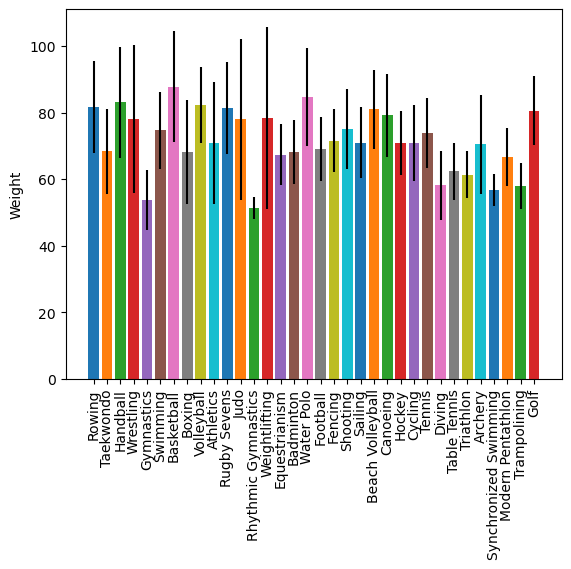

In [87]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals["Sport"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

fig.savefig("sports_weights.png")

#### The Idea, at no point during the creation of this figure did we need to know how many different sports are recorded in the DataFrame. Our code would automatically add bars or reduce the number of bars, depending on the input data.

#### The Idea is enabled beacuse ax.fun is supports Incremental Additional Loads of Data

## Do not start from Scratch, Visit Matplotlib Gallery